# ENEXIS Graduation Project

####  EDA of PV installed capacity

### Contents

#### Characteristics of den Bosch - demographic features vs installed PV by buurt
   * [1. Reading of PV installed capacity & demographics dataset](#readpv)
   * [2. Selection of a specific municipality to focus on : Best](#selbest)
   * [3. Demographic characteristics of Best by buurt](#dembest)

#### PV installed capacity  - development in time in den Bosch by buurt
  
   * [1. Total number of installations as function of time](#total)
   * [2. Percentage of privately owned houses](#koop)
   * [3. Percentage of one family houses](#een)
   * [4. Housholds with PV per 100 households in 2022](#pv2022)
   * [5. Province](#prov)
   * [6. Average electricity consumption](#elec)

In [62]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata
pd.options.mode.chained_assignment = None  # default='warn'

<a id='readpv'></a>
#### 1. Reading of PV installed capacity & demographics dataset

In [63]:
c_path = "./data/"
v_file = "PV installed capacity & demographics"

In [64]:
df     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31121 entries, 0 to 31120
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       31121 non-null  object 
 1   BU_2021                                    31121 non-null  object 
 2   BU_NAAM                                    31121 non-null  object 
 3   WK_2021                                    31121 non-null  object 
 4   WK_NAAM                                    31121 non-null  object 
 5   GM_2021                                    31121 non-null  object 
 6   GM_NAAM                                    31121 non-null  object 
 7   ProvinciecodePV                            31121 non-null  object 
 8   Provincienaam                              31121 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  31121 non-null  float64
 10  Opgesteld vermogen    

In [66]:
df.shape

(31121, 35)

In order to keep the uniform distance between time points, records at mid-year are removed

In [67]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2019-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,95.704698,26.577181
1,2018-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,71.677852,20.671141
2,2017-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,48.724832,12.818792
3,2016-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,33.825503,8.590604
4,2020-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,2930.0,1590.0,2.098425,0.811594,0.174497,1.3,0.8,5.0,108.120805,26.308725


In [68]:
df = df.drop(df[df['Year'].isin(['2021-07-01', '2020-07-01'])].index)

In [69]:
df.columns

Index(['Year', 'BU_2021', 'BU_NAAM', 'WK_2021', 'WK_NAAM', 'GM_2021',
       'GM_NAAM', 'ProvinciecodePV', 'Provincienaam',
       'Aantal aansluitingen met opwekinstallatie', 'Opgesteld vermogen',
       'OV_per_installatie', 'WijkenEnBuurten', 'Gemeentenaam_1',
       'SoortRegio_2', 'MeestVoorkomendePostcode_113', 'HuishoudensTotaal_28',
       'GemiddeldeHuishoudensgrootte_32', 'Bevolkingsdichtheid_33',
       'GemiddeldeWoningwaarde_35', 'PercentageEengezinswoning_36',
       'Koopwoningen_40', 'InBezitWoningcorporatie_42',
       'InBezitOverigeVerhuurders_43', 'BouwjaarVanaf2000_46',
       'GemiddeldElektriciteitsverbruikTotaal_47',
       'GemiddeldAardgasverbruikTotaal_55', 'Gemiddeld_opleidingsniveau',
       'Percent_inkomensontvangers', 'Bedrijfsvestigingen_per_huishuidens',
       'PersonenautoSPerHuishouden_102', 'AfstandTotSchool_108',
       'MateVanStedelijkheid_115', 'Opgesteld_vermogen_per100houshoudens',
       'PVinstallaties_per100houshoudens'],
      dtype='obje

In [70]:
df = df.drop(['WijkenEnBuurten', 'Gemeentenaam_1', 'SoortRegio_2', ], axis = 1)

In [71]:
# Changing the format of `Year1 variable into 4 digit number
df['Year'] = df['Year'].apply(lambda x: x[:4])

In [72]:
df = df.sort_values(by = 'Year')

In [73]:
# storing the original dataset under variable `df_orig`
df_orig = df.copy()

In [74]:
#df = df_orig.copy()

In [75]:
df['GM_NAAM'].unique()

array(['Loon op Zand', 'Waalwijk', 'Stadskanaal', 'Emmen', 'Breda',
       'Veendam', 'Hengelo', 'Hardenberg', 'Weert', 'Westerveld',
       'Rijssen-Holten', 'Zwartewaterland', 'Roosendaal', 'Voerendaal',
       'Venlo', 'Kerkrade', 'Ommen', 'Leudal', 'Oldambt', 'Oss',
       'Woensdrecht', 'Vught', 'Staphorst', 'Meerssen', 'Wierden',
       'Kampen', "'s-Hertogenbosch", 'Enschede', 'Brunssum', 'Veldhoven',
       'Olst-Wijhe', 'Coevorden', 'Oldenzaal', 'Boekel', 'Tubbergen',
       'Borger-Odoorn', 'Son en Breugel', 'Moerdijk', 'Raalte',
       'Halderberge', 'Maastricht', 'Zwolle', 'Oosterhout', 'Borne',
       'Reusel-De Mierden', 'Twenterand', 'Etten-Leur', 'Best', 'Someren',
       'Bladel', 'Boxmeer', 'Boxtel', 'Meppel', 'Deventer', 'Waalre',
       'Echt-Susteren', 'Landerd', 'Heerlen', 'Hellendoorn', 'Landgraaf',
       'Midden-Drenthe', 'Roermond', 'Zundert', 'De Wolden',
       'Steenwijkerland', 'Eersel', 'Roerdalen', 'Deurne', 'Dongen',
       'Dinkelland', 'Heeze-Leende',

<a id='selbest'></a>
#### 2. Selection of a specific municipality to focus on : Best

In [76]:
df = df[df['GM_NAAM'] == "'s-Hertogenbosch"]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 13015 to 13546
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       547 non-null    object 
 1   BU_2021                                    547 non-null    object 
 2   BU_NAAM                                    547 non-null    object 
 3   WK_2021                                    547 non-null    object 
 4   WK_NAAM                                    547 non-null    object 
 5   GM_2021                                    547 non-null    object 
 6   GM_NAAM                                    547 non-null    object 
 7   ProvinciecodePV                            547 non-null    object 
 8   Provincienaam                              547 non-null    object 
 9   Aantal aansluitingen met opwekinstallatie  547 non-null    float64
 10  Opgesteld vermogen  

In [78]:
df['Year'].value_counts()

2016    83
2017    83
2018    83
2019    82
2022    78
2021    74
2020    64
Name: Year, dtype: int64

It draws attention that there are many missing values in 2020, and also 2021 and 2022. 

In [79]:
df = df.drop(['BU_2021', 'WK_2021', 'WK_NAAM', 'GM_2021',
       'GM_NAAM', 'ProvinciecodePV', 'Provincienaam'], axis = 1)

In [80]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,547,7,2016,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_NAAM,547,83,De Meerendonk,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aantal aansluitingen met opwekinstallatie,547.0,NaN,NaN,NaN,74.378428,86.762936,0.0,12.0,44.0,111.0,678.0
Opgesteld vermogen,547.0,NaN,NaN,NaN,285.190128,347.779177,0.0,42.0,166.0,380.0,2419.0
OV_per_installatie,480.0,NaN,NaN,NaN,4.16325,2.187457,0.910714,3.084166,3.651087,4.443867,16.941176
MeestVoorkomendePostcode_113,547.0,NaN,NaN,NaN,5243.552102,45.936795,5211.0,5221.0,5233.0,5243.0,5391.0
HuishoudensTotaal_28,547.0,NaN,NaN,NaN,886.946984,748.930864,25.0,310.0,800.0,1165.0,4030.0
GemiddeldeHuishoudensgrootte_32,547.0,NaN,NaN,NaN,2.241133,0.420414,1.4,1.9,2.2,2.5,3.1
Bevolkingsdichtheid_33,547.0,NaN,NaN,NaN,4141.833638,3027.47344,23.0,1546.0,4224.0,6292.5,12891.0
GemiddeldeWoningwaarde_35,501.0,NaN,NaN,NaN,303.451098,110.79056,170.0,222.0,295.0,349.0,792.0


In [81]:
df[df.isna().any(axis=1)]

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
13015,2016,De Meerendonk,7.0,27.0,3.857143,5216,175,2.7,644.0,355.0,...,2830.0,910.0,NaN,0.645161,0.314286,1.0,0.3,3.0,15.428571,4.000000
13024,2016,De Bossche Pad,0.0,0.0,NaN,5215,310,1.7,7935.0,222.0,...,2400.0,820.0,2.097561,0.769231,0.145161,0.7,1.0,1.0,0.000000,0.000000
12959,2016,De Hofstad,0.0,0.0,NaN,5211,670,1.6,12770.0,221.0,...,2090.0,870.0,2.214286,0.833333,0.164179,0.5,1.2,1.0,0.000000,0.000000
12983,2016,Vughterpoort,0.0,0.0,NaN,5211,135,2.8,1643.0,792.0,...,4660.0,2560.0,2.592593,0.800000,0.925926,1.9,1.0,3.0,0.000000,0.000000
12966,2016,Binnenstad-Noord,0.0,0.0,NaN,5211,590,1.4,8753.0,248.0,...,2130.0,950.0,2.147059,0.919540,0.101695,0.6,0.9,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13528,2022,De Rietvelden-Oost,10.0,111.0,11.100000,5222,70,1.7,151.0,NaN,...,2780.0,1810.0,NaN,0.869565,2.214286,NaN,0.9,2.0,158.571429,14.285714
13615,2022,Landelijk gebied Nuland,12.0,159.0,13.250000,5391,40,3.1,23.0,NaN,...,4560.0,3050.0,2.200000,0.769231,0.875000,NaN,2.1,5.0,397.500000,30.000000
13597,2022,De Lage Kant,35.0,191.0,5.457143,5391,90,2.8,158.0,443.0,...,4220.0,2110.0,NaN,0.769231,0.500000,1.3,1.3,5.0,212.222222,38.888889
13589,2022,Bedrijventerrein Nuland,27.0,376.0,13.925926,5391,35,2.7,713.0,NaN,...,5470.0,2010.0,2.000000,1.000000,1.285714,NaN,1.1,5.0,1074.285714,77.142857


In [82]:
df[df['Opgesteld vermogen'] == 0].T

,13024,12959,12983,12966,13306,13282,13251,13273,13356,13109,...,13477,13396,13525,13191,13217,13021,13353,13395,13524,13476
Year,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019
BU_NAAM,De Bossche Pad,De Hofstad,Vughterpoort,Binnenstad-Noord,De Slagen,De Koornwaard,De Lanen,Empel-Oost,De Sprookjesbuurt,Orthenpoort,...,Oud Empel,De Italiaanse Buurt,De Rietvelden-Oost,Bedrijventerrein Kruisstraat,Vlietdijk,De Bossche Pad,De Sprookjesbuurt,De Italiaanse Buurt,De Rietvelden-Oost,Oud Empel
Aantal aansluitingen met opwekinstallatie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Opgesteld vermogen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OV_per_installatie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MeestVoorkomendePostcode_113,5215,5211,5211,5211,5233,5236,5245,5236,5231,5212,...,5235,5237,5222,5249,5245,5215,5231,5237,5222,5235
HuishoudensTotaal_28,310,670,135,590,750,35,110,890,775,270,...,25,255,70,40,155,310,775,255,70,25
GemiddeldeHuishoudensgrootte_32,1.7,1.6,2.8,1.4,2.0,3.0,2.8,2.8,2.2,1.9,...,2.3,2.1,1.7,2.0,1.5,1.7,2.2,2.1,1.7,2.3
Bevolkingsdichtheid_33,7935.0,12770.0,1643.0,8753.0,4551.0,35.0,778.0,2254.0,6974.0,3180.0,...,71.0,1297.0,151.0,254.0,743.0,7935.0,6974.0,1297.0,151.0,71.0
GemiddeldeWoningwaarde_35,222.0,221.0,792.0,248.0,186.0,NaN,368.0,348.0,179.0,240.0,...,NaN,323.0,NaN,NaN,209.0,222.0,179.0,323.0,NaN,NaN


In [59]:
df[df['BU_NAAM'] == 'De Sprookjesbuurt'].T

,13356,13355,13354,13353,13358
Year,2016,2017,2018,2019,2022
BU_NAAM,De Sprookjesbuurt,De Sprookjesbuurt,De Sprookjesbuurt,De Sprookjesbuurt,De Sprookjesbuurt
Aantal aansluitingen met opwekinstallatie,0.0,3.0,4.0,0.0,106.0
Opgesteld vermogen,0.0,4.0,5.0,0.0,332.0
OV_per_installatie,NaN,1.333333,1.25,NaN,3.132075
MeestVoorkomendePostcode_113,5231,5231,5231,5231,5231
HuishoudensTotaal_28,775,775,775,775,775
GemiddeldeHuishoudensgrootte_32,2.2,2.2,2.2,2.2,2.2
Bevolkingsdichtheid_33,6974.0,6974.0,6974.0,6974.0,6974.0
GemiddeldeWoningwaarde_35,179.0,179.0,179.0,179.0,179.0


<a id='dembest'></a>
#### 3. Demographic characteristics of Best by buurt

In [83]:
df_2022 = df[df['Year'] == '2022']

In [84]:
df_2022 = df_2022.drop(['Year'], axis = 1)

In [85]:
df_2022 = df_2022.sort_values(by = 'Opgesteld_vermogen_per100houshoudens', ascending = False)

In [86]:
df_2022 = df_2022.set_index('BU_NAAM')

In [87]:
df_2022.T

BU_NAAM,Bedrijventerrein Nuland,Bedrijventerrein Kruisstraat,De Vutter,Het Vinkel,De Herven,Landelijk gebied Nuland,Landelijk gebied Vinkel,Bokhoven,A2 zone Rosmalen-Zuid,Heeseind,...,De Hambaken,De Vliert,De Reit,Binnenstad-Oost,Het Zand,De Haren,De Muntel,Bazeldonk,Binnenstad-Noord,Binnenstad-Centrum
Aantal aansluitingen met opwekinstallatie,27.000000,17.000000,14.000000,19.000000,307.000000,12.000000,93.000000,53.000000,21.000000,50.000000,...,35.000000,98.000000,41.000000,63.000000,44.000000,18.000000,53.000000,20.000000,56.000000,70.000000
Opgesteld vermogen,376.000000,288.000000,199.000000,192.000000,1290.000000,159.000000,986.000000,365.000000,172.000000,354.000000,...,117.000000,324.000000,135.000000,208.000000,233.000000,63.000000,204.000000,87.000000,51.000000,327.000000
OV_per_installatie,13.925926,16.941176,14.214286,10.105263,4.201954,13.250000,10.602151,6.886792,8.190476,7.080000,...,3.342857,3.306122,3.292683,3.301587,5.295455,3.500000,3.849057,4.350000,0.910714,4.671429
MeestVoorkomendePostcode_113,5391.000000,5249.000000,5221.000000,5248.000000,5232.000000,5391.000000,5383.000000,5221.000000,5242.000000,5391.000000,...,5231.000000,5212.000000,5233.000000,5211.000000,5211.000000,5233.000000,5212.000000,5216.000000,5211.000000,5211.000000
HuishoudensTotaal_28,35.000000,40.000000,30.000000,45.000000,310.000000,40.000000,295.000000,115.000000,70.000000,145.000000,...,585.000000,1700.000000,755.000000,1170.000000,1710.000000,495.000000,1870.000000,900.000000,590.000000,4030.000000
GemiddeldeHuishoudensgrootte_32,2.700000,2.000000,3.000000,2.500000,2.700000,3.100000,2.900000,2.500000,2.400000,2.700000,...,2.300000,2.000000,1.900000,1.500000,1.400000,2.100000,1.700000,1.700000,1.400000,1.500000
Bevolkingsdichtheid_33,713.000000,254.000000,258.000000,34.000000,1702.000000,23.000000,79.000000,102.000000,203.000000,145.000000,...,6575.000000,5659.000000,5132.000000,6814.000000,5208.000000,5468.000000,11940.000000,6407.000000,8753.000000,8626.000000
GemiddeldeWoningwaarde_35,NaN,NaN,NaN,NaN,581.000000,NaN,454.000000,488.000000,632.000000,475.000000,...,187.000000,315.000000,205.000000,342.000000,263.000000,190.000000,257.000000,215.000000,248.000000,311.000000
PercentageEengezinswoning_36,86.000000,94.000000,88.000000,96.000000,99.000000,95.000000,95.000000,97.000000,97.000000,48.000000,...,90.000000,51.000000,63.000000,22.000000,9.000000,100.000000,36.000000,35.000000,7.000000,14.000000
Koopwoningen_40,89.000000,65.000000,88.000000,76.000000,98.000000,86.000000,81.000000,90.000000,91.000000,43.000000,...,29.000000,52.000000,30.000000,34.000000,26.000000,17.000000,35.000000,23.000000,17.000000,33.000000


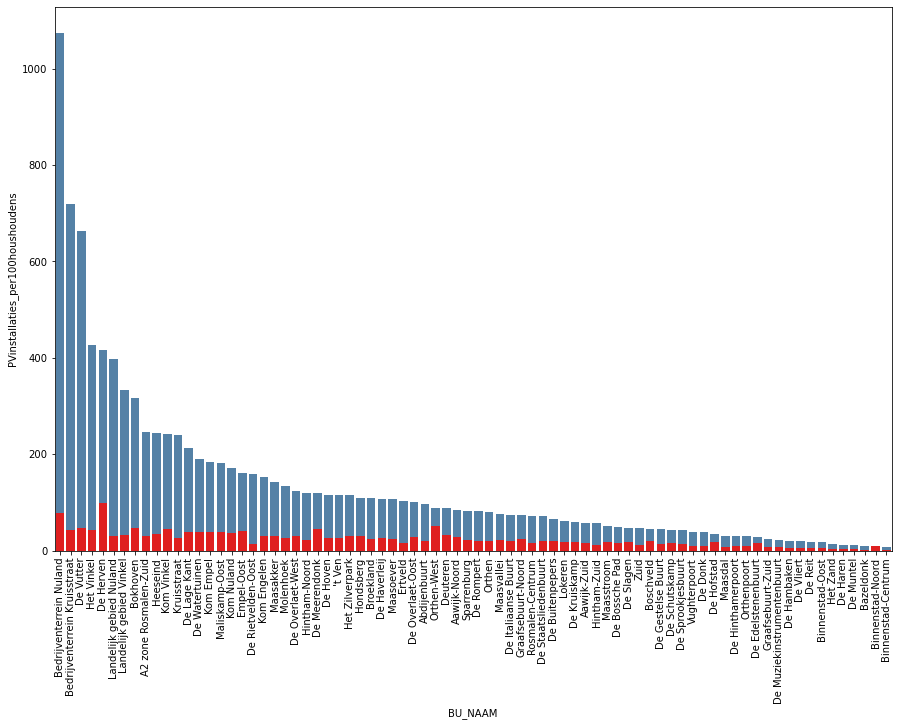

In [108]:
plt.figure(figsize = (15,10))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Opgesteld_vermogen_per100houshoudens', color = 'SteelBlue')
sns.barplot(data = df_2022, x = df_2022.index, y = 'PVinstallaties_per100houshoudens', color = 'Red')
plt.xticks(rotation = 90)
plt.show()

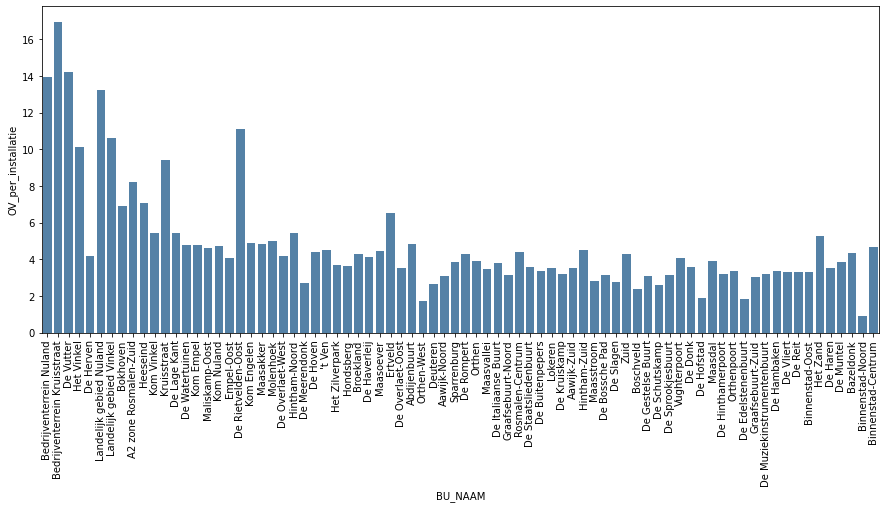

In [90]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'OV_per_installatie', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

Many buurten with high average OV per installation have names containing "Bedrijventerrein" or "Landelijk gebied". These buurten are possibly ones with lot of commercial or agricultural activity and therefore not entirely residential character. PV figures in these areas may therefore be contaminated by commercial installations. Such buurten should be removed from the dataset.

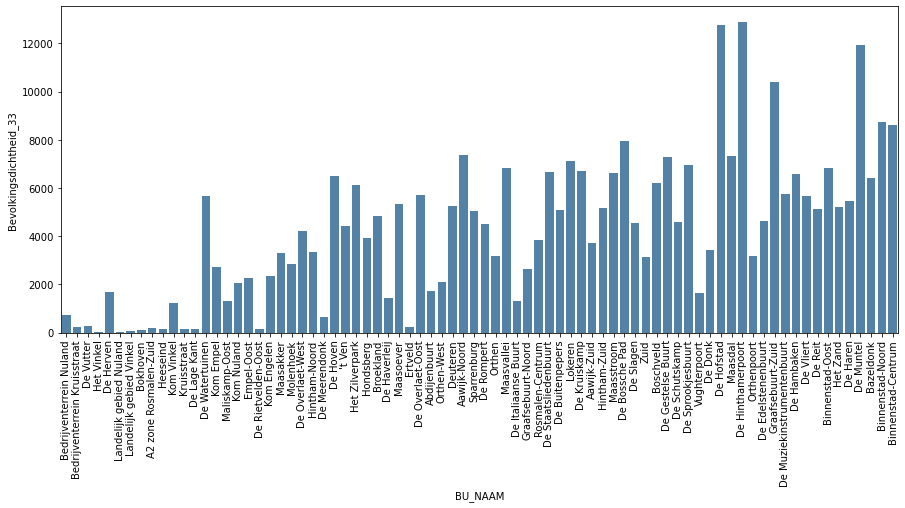

In [91]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Bevolkingsdichtheid_33', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

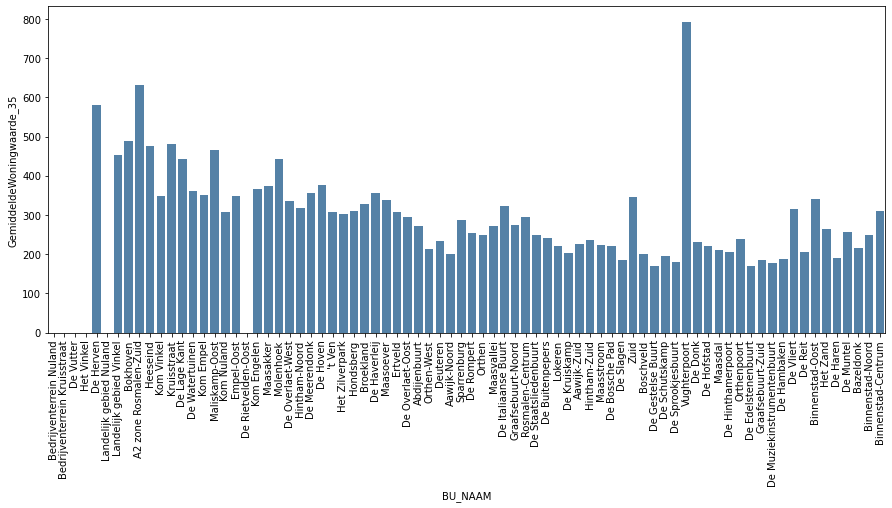

In [92]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'GemiddeldeWoningwaarde_35', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

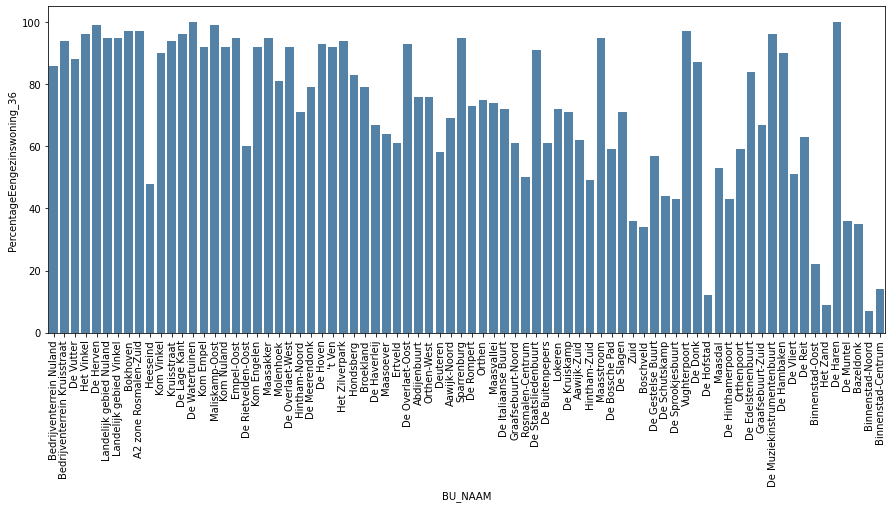

In [93]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'PercentageEengezinswoning_36', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

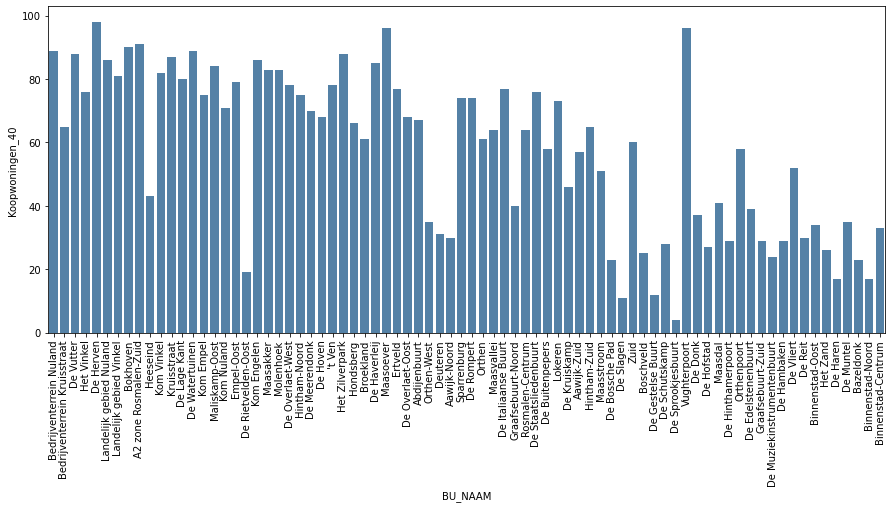

In [94]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Koopwoningen_40', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

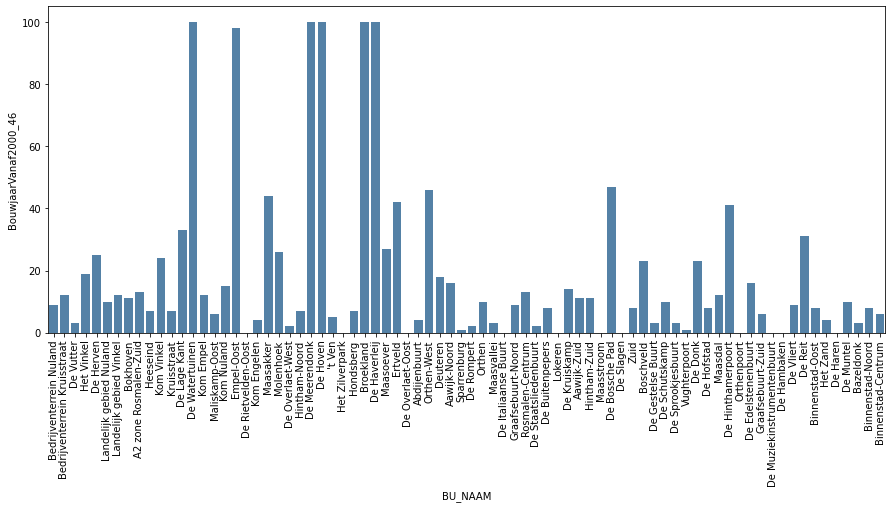

In [95]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'BouwjaarVanaf2000_46', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

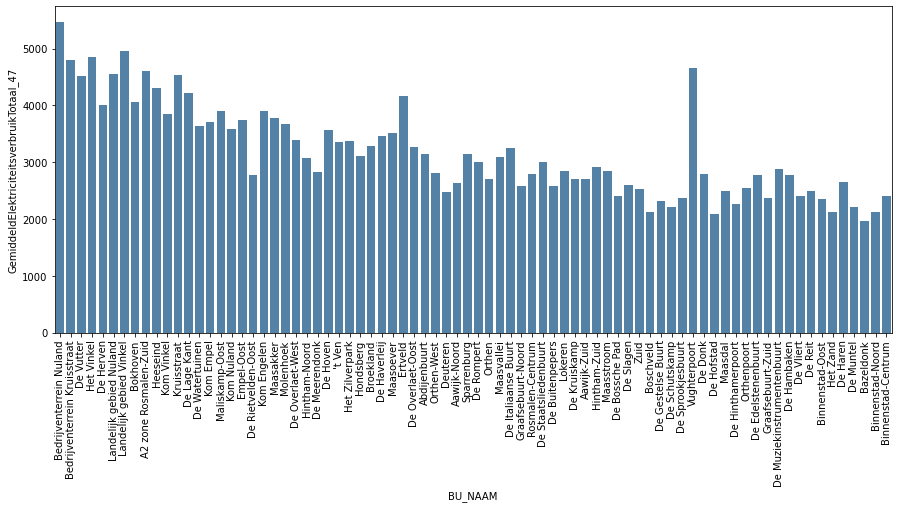

In [96]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'GemiddeldElektriciteitsverbruikTotaal_47', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

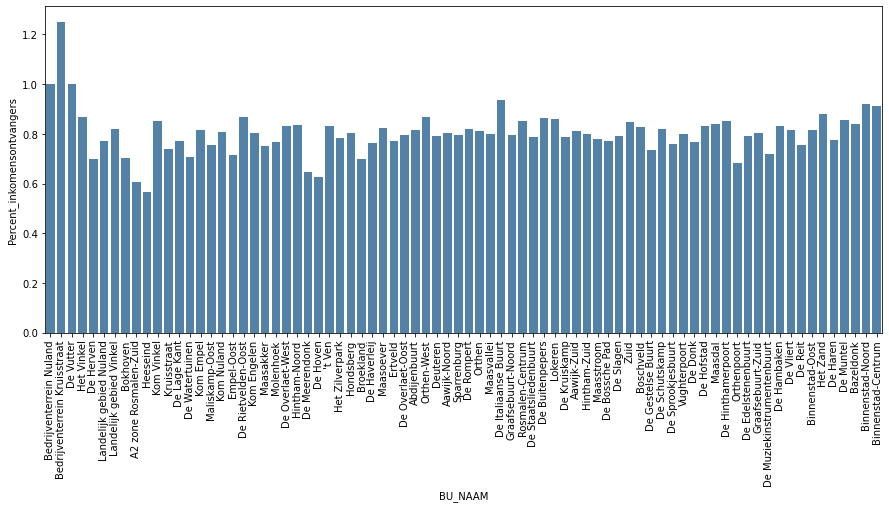

In [97]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Percent_inkomensontvangers', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

In one case the "Percent inkomensontvangers" is larger than 1. Is it possible or is it a mistake?

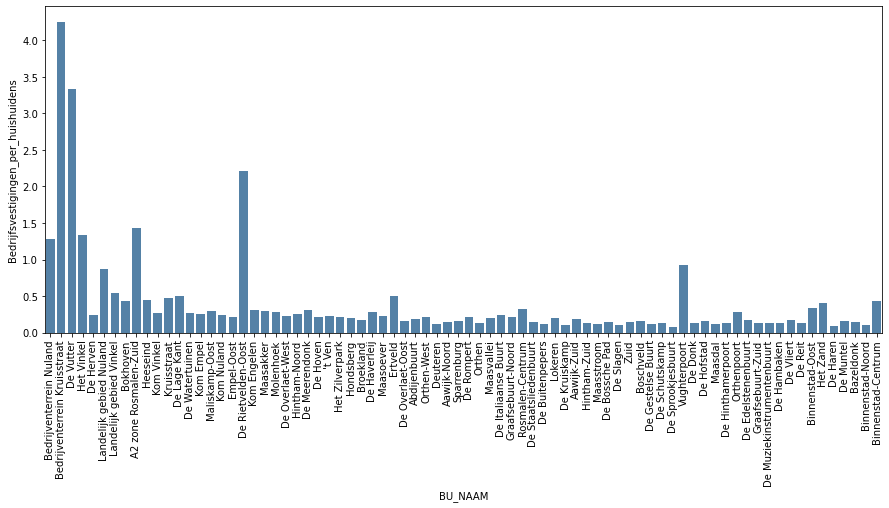

In [98]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'Bedrijfsvestigingen_per_huishuidens', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

Again, buurten with high average OV capacity also have typically high number of firms. This is another argument to consider such buurten as not typically residential and therefore filter them off. Let's visualize this correlation.

<AxesSubplot:xlabel='Bedrijfsvestigingen_per_huishuidens', ylabel='OV_per_installatie'>

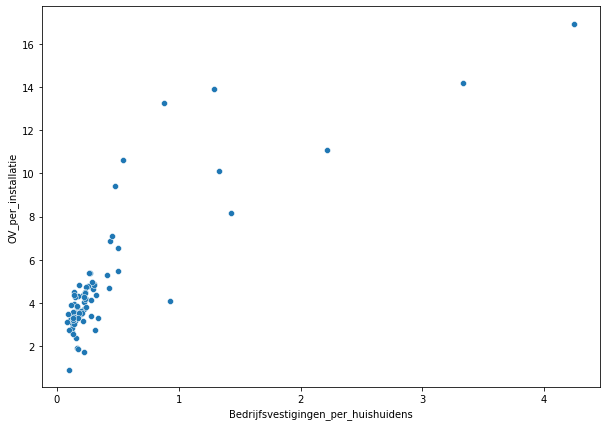

In [101]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = df_2022, x = 'Bedrijfsvestigingen_per_huishuidens', y = 'OV_per_installatie')

Let's investigate the outliers, i.e. buurten with OV > 8 and Bedrijfsvestigingen > 0.8

In [107]:
df_2022[(df_2022['Bedrijfsvestigingen_per_huishuidens'] > 0.8) | (df_2022['OV_per_installatie'] > 8)].T

BU_NAAM,Bedrijventerrein Nuland,Bedrijventerrein Kruisstraat,De Vutter,Het Vinkel,Landelijk gebied Nuland,Landelijk gebied Vinkel,A2 zone Rosmalen-Zuid,Kruisstraat,De Rietvelden-Oost,Vughterpoort
Aantal aansluitingen met opwekinstallatie,27.000000,17.000000,14.000000,19.000000,12.000000,93.000000,21.000000,51.000000,10.000000,13.000000
Opgesteld vermogen,376.000000,288.000000,199.000000,192.000000,159.000000,986.000000,172.000000,481.000000,111.000000,53.000000
OV_per_installatie,13.925926,16.941176,14.214286,10.105263,13.250000,10.602151,8.190476,9.431373,11.100000,4.076923
MeestVoorkomendePostcode_113,5391.000000,5249.000000,5221.000000,5248.000000,5391.000000,5383.000000,5242.000000,5243.000000,5222.000000,5211.000000
HuishoudensTotaal_28,35.000000,40.000000,30.000000,45.000000,40.000000,295.000000,70.000000,200.000000,70.000000,135.000000
GemiddeldeHuishoudensgrootte_32,2.700000,2.000000,3.000000,2.500000,3.100000,2.900000,2.400000,2.700000,1.700000,2.800000
Bevolkingsdichtheid_33,713.000000,254.000000,258.000000,34.000000,23.000000,79.000000,203.000000,151.000000,151.000000,1643.000000
GemiddeldeWoningwaarde_35,NaN,NaN,NaN,NaN,NaN,454.000000,632.000000,482.000000,NaN,792.000000
PercentageEengezinswoning_36,86.000000,94.000000,88.000000,96.000000,95.000000,95.000000,97.000000,94.000000,60.000000,97.000000
Koopwoningen_40,89.000000,65.000000,88.000000,76.000000,86.000000,81.000000,91.000000,87.000000,19.000000,96.000000


Typical for this group is:
- low total number of households
- house value is often missing
- high percentage of eengezinswoningen and koopwoningen
- high degree of urbanization
- buurten with "bedrijfsterrein" and "landelijk gebied" in the name are all in here

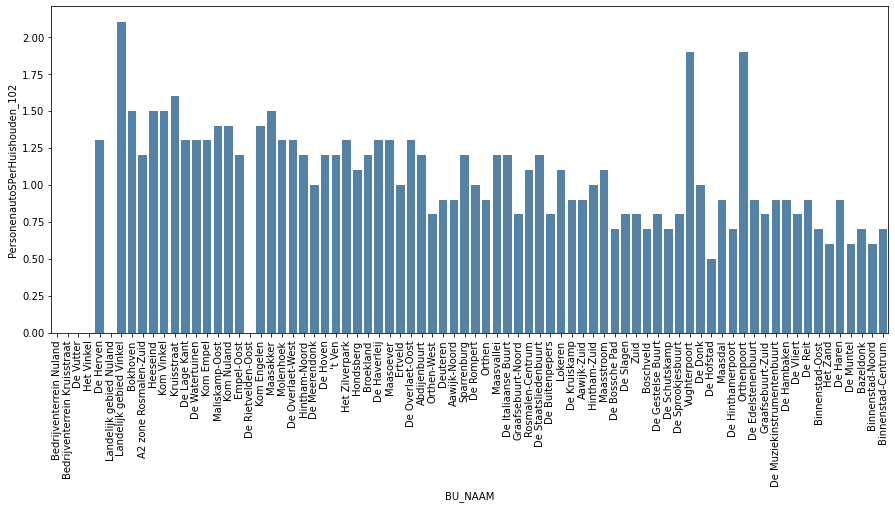

In [102]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'PersonenautoSPerHuishouden_102', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

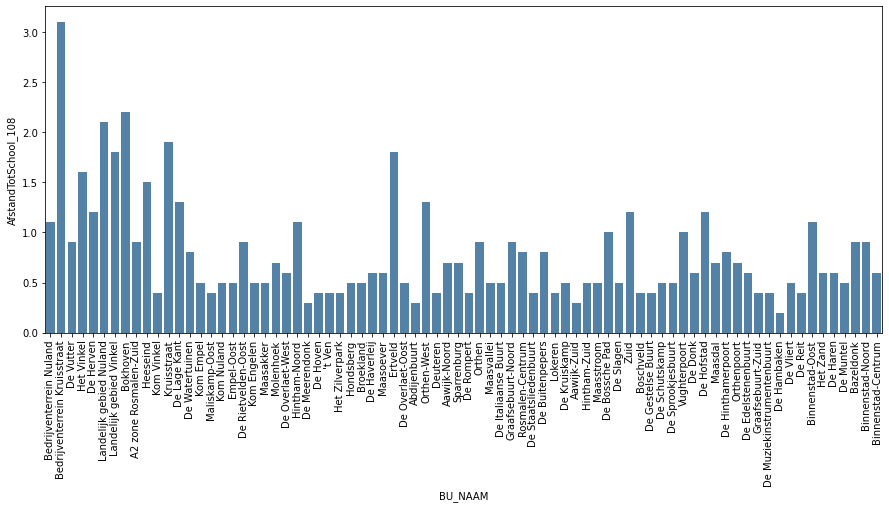

In [109]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'AfstandTotSchool_108', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

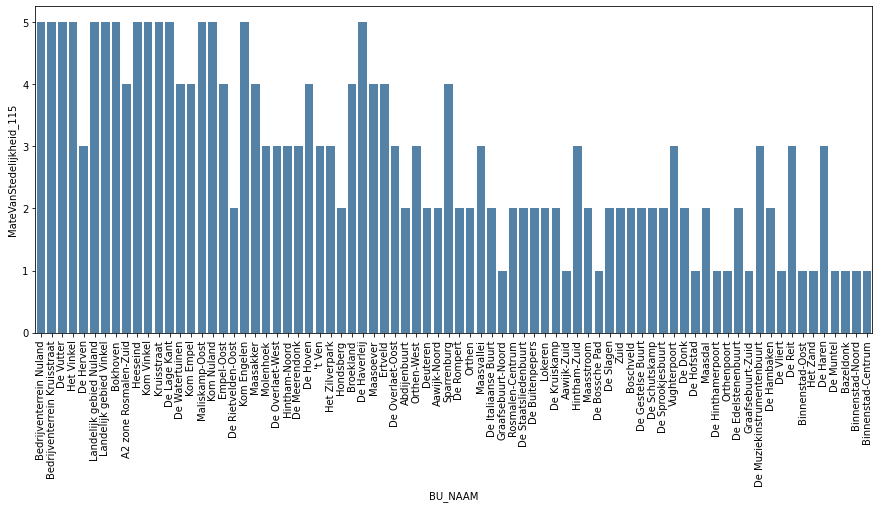

In [110]:
plt.figure(figsize = (15,6))
sns.barplot(data = df_2022, x = df_2022.index, y = 'MateVanStedelijkheid_115', color = 'SteelBlue')
plt.xticks(rotation = 90)
plt.show()

In [111]:
corr_matrix = df_2022.corr().sort_values(by = 'Opgesteld_vermogen_per100houshoudens', ascending = False).transpose()
corr_matrix = corr_matrix.sort_values(by = 'Opgesteld_vermogen_per100houshoudens', ascending = False)

<AxesSubplot:>

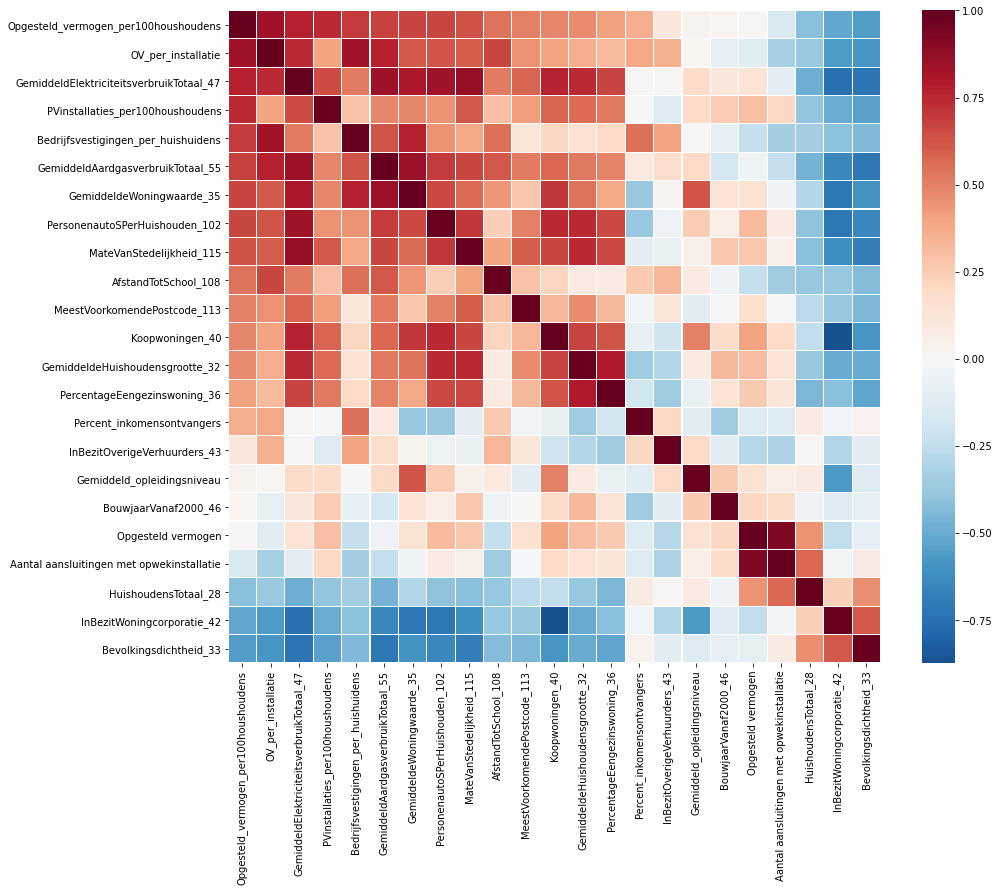

In [112]:
plt.figure(figsize = (15,12))
sns.heatmap(data = corr_matrix, annot = False, fmt='.2f', cmap = 'RdBu_r', linewidths=.1, square=True, vmax=1, center = 0)

In [113]:
#fig, ax = plt.subplots(3, 4, figsize=(15,10))
#for i, col in enumerate(df_2022.values):
#    _ax=ax[i // 4, i % 4]
#    sns.barplot(x='BU_NAAM', y=col, data=df_2022, ax=_ax)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)
#plt.show()

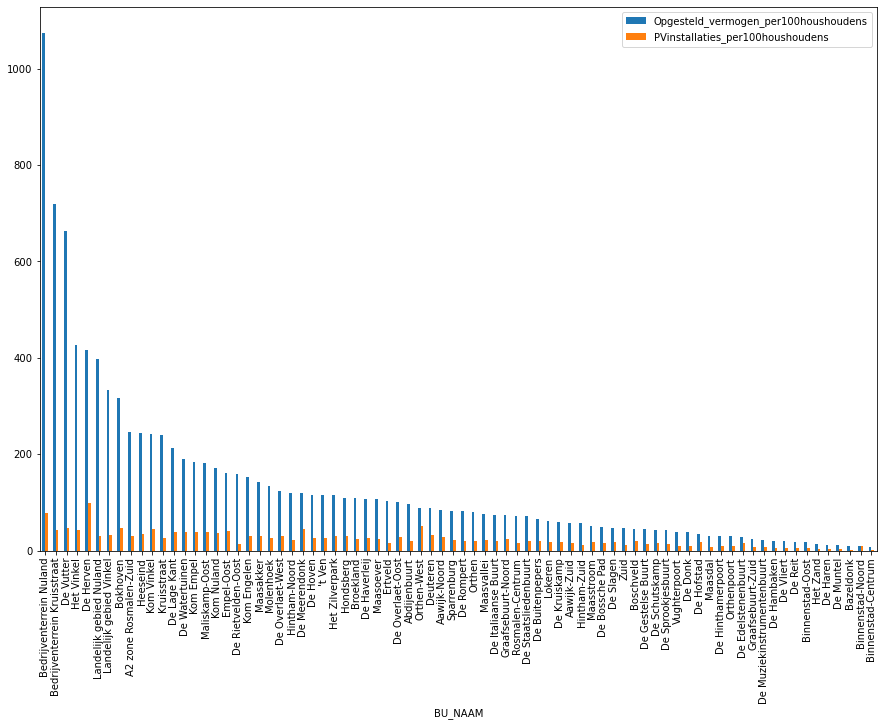

In [116]:
ax = df_2022[['Opgesteld_vermogen_per100houshoudens', 'PVinstallaties_per100houshoudens']].plot.bar(figsize = (15,10))

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

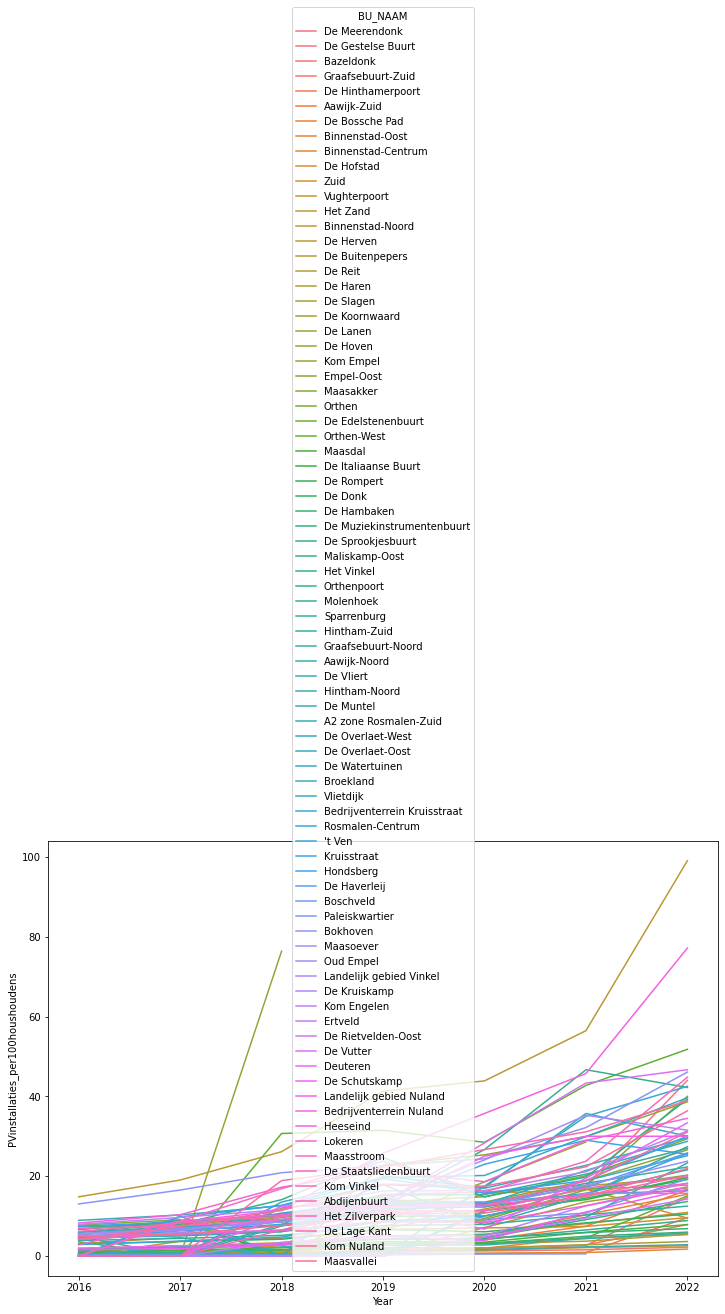

In [117]:
plt.figure(figsize = (12,8))
sns.lineplot(data = df, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'BU_NAAM')

It remains to explain why for some buurten is the number of installations apparently decreasing

In [118]:
table_Bosch1 = df.groupby('Year').mean()
#table_PV1 = table_PV1.reset_index()

In [120]:
table_Bosch1.T

Year,2016,2017,2018,2019,2020,2021,2022
Aantal aansluitingen met opwekinstallatie,22.289157,29.253012,45.686747,71.902439,85.828125,114.621622,163.384615
Opgesteld vermogen,75.927711,100.831325,157.192771,255.975610,340.140625,463.189189,657.000000
OV_per_installatie,3.629154,3.682524,3.761754,3.948111,4.282571,4.794567,4.807016
MeestVoorkomendePostcode_113,5243.240964,5243.240964,5243.240964,5243.219512,5243.234375,5245.135135,5243.653846
HuishoudensTotaal_28,857.048193,857.048193,857.048193,866.158537,995.312500,922.364865,881.730769
GemiddeldeHuishoudensgrootte_32,2.237349,2.237349,2.237349,2.230488,2.240625,2.268919,2.238462
Bevolkingsdichtheid_33,4103.915663,4103.915663,4103.915663,4144.475610,4198.218750,4088.581081,4264.358974
GemiddeldeWoningwaarde_35,302.226667,302.226667,302.226667,301.337838,304.822581,309.382353,302.666667
PercentageEengezinswoning_36,70.626506,70.626506,70.626506,70.487805,70.656250,72.256757,71.769231
Koopwoningen_40,58.385542,58.385542,58.385542,58.365854,61.046875,60.783784,57.910256


<AxesSubplot:xlabel='Year', ylabel='Opgesteld_vermogen_per100houshoudens'>

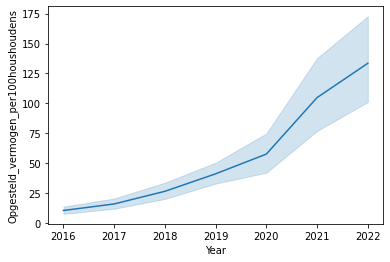

In [126]:
sns.lineplot(data = df, x = 'Year', y = 'Opgesteld_vermogen_per100houshoudens')

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

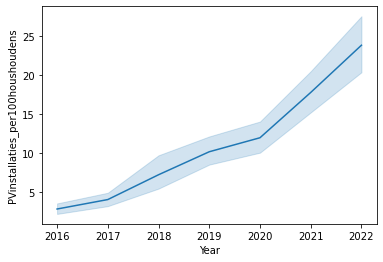

In [127]:
sns.lineplot(data = df, x = 'Year', y = 'PVinstallaties_per100houshoudens')

### EDA of PV installed capacity as a function of demographic features

<a id='total'></a>
#### 1. Total number of installations as function of time

In [128]:
table_PV1 = df.groupby('Year').mean()
table_PV1 = table_PV1.reset_index()

In [129]:
table_PV1

,Year,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,PercentageEengezinswoning_36,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016,22.289157,75.927711,3.629154,5243.240964,857.048193,2.237349,4103.915663,302.226667,70.626506,...,3215.783133,1342.891566,2.079277,0.813272,0.401626,1.070667,0.819277,2.867470,10.538315,2.834719
1,2017,29.253012,100.831325,3.682524,5243.240964,857.048193,2.237349,4103.915663,302.226667,70.626506,...,3215.783133,1342.891566,2.079277,0.813272,0.401626,1.070667,0.819277,2.867470,15.995884,4.045717
2,2018,45.686747,157.192771,3.761754,5243.240964,857.048193,2.237349,4103.915663,302.226667,70.626506,...,3215.783133,1342.891566,2.079277,0.813272,0.401626,1.070667,0.819277,2.867470,26.555476,7.223371
3,2019,71.902439,255.975610,3.948111,5243.219512,866.158537,2.230488,4144.475610,301.337838,70.487805,...,3217.804878,1344.756098,2.078498,0.815323,0.404861,1.070270,0.810976,2.853659,41.170075,10.169684
4,2020,85.828125,340.140625,4.282571,5243.234375,995.312500,2.240625,4198.218750,304.822581,70.656250,...,3147.968750,1283.906250,2.101603,0.793737,0.274185,1.079032,0.745313,2.875000,57.668845,11.963494
5,2021,114.621622,463.189189,4.794567,5245.135135,922.364865,2.268919,4088.581081,309.382353,72.256757,...,3262.972973,1365.270270,2.084398,0.807758,0.393154,1.080882,0.805405,2.945946,104.860131,17.763643
6,2022,163.384615,657.000000,4.807016,5243.653846,881.730769,2.238462,4264.358974,302.666667,71.769231,...,3180.256410,1350.512821,2.070421,0.803357,0.399502,1.077778,0.782051,2.846154,133.528996,23.814914


<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

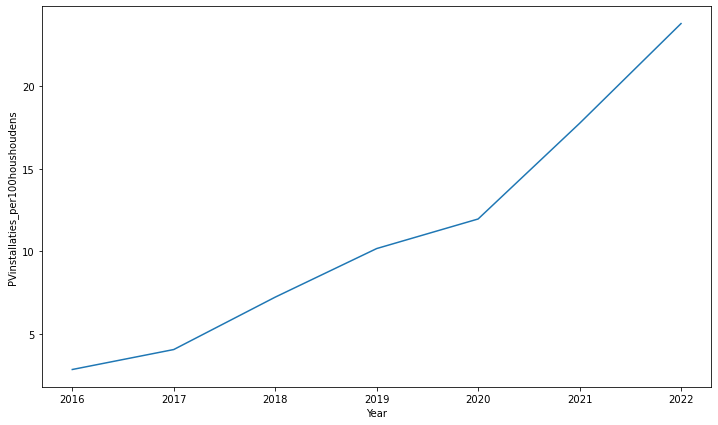

In [130]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV1, x = 'Year', y = 'PVinstallaties_per100houshoudens')

In [131]:
table_PV2 = df.groupby(['Year', 'MateVanStedelijkheid_115']).mean()
table_PV2 = table_PV2.reset_index()

In [132]:
table_PV2.head()

,Year,MateVanStedelijkheid_115,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,BouwjaarVanaf2000_46,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016,1.0,8.000000,24.600000,3.931219,5213.266667,1363.666667,1.693333,7554.133333,254.866667,...,16.800000,2305.333333,958.666667,2.201912,0.834883,0.213248,0.780000,0.760000,1.505729,0.496577
1,2016,2.0,21.291667,62.041667,3.214410,5229.666667,1046.666667,2.083333,4923.208333,232.695652,...,8.000000,2703.333333,1132.500000,1.942627,0.816356,0.240309,0.943478,0.566667,6.561627,2.219431
2,2016,3.0,35.352941,125.000000,3.188609,5235.529412,718.823529,2.323529,3642.000000,327.187500,...,22.705882,3297.647059,1332.352941,2.096383,0.829311,0.288426,1.150000,0.700000,14.522281,4.178439
3,2016,4.0,31.000000,102.636364,3.368400,5240.545455,722.727273,2.600000,3351.272727,370.000000,...,57.909091,3653.636364,1378.181818,2.190929,0.723009,0.353662,1.227273,0.790909,11.921883,3.534503
4,2016,5.0,17.312500,74.375000,4.965034,5301.750000,336.875000,2.637500,648.625000,418.700000,...,17.812500,4450.000000,2005.625000,2.067186,0.833402,0.973457,1.500000,1.400000,19.787228,4.040858


<AxesSubplot:xlabel='Year', ylabel='Opgesteld vermogen'>

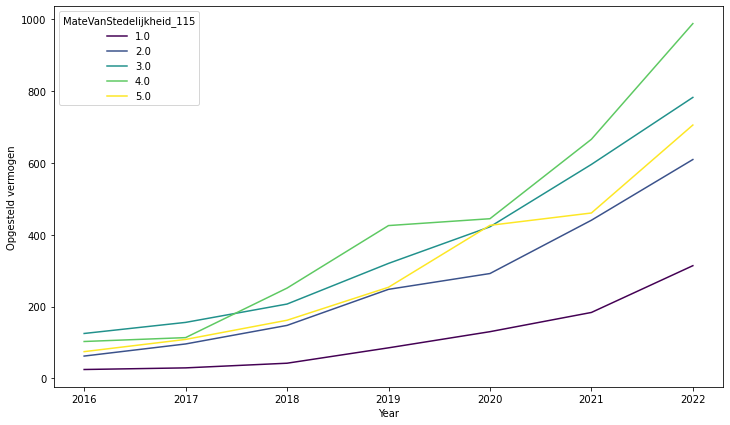

In [133]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'Opgesteld vermogen', hue = 'MateVanStedelijkheid_115', palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='OV_per_installatie'>

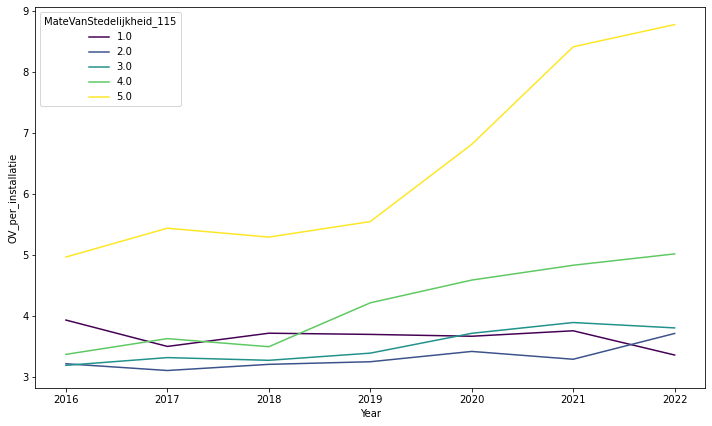

In [134]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'OV_per_installatie', hue = 'MateVanStedelijkheid_115', palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='Opgesteld_vermogen_per100houshoudens'>

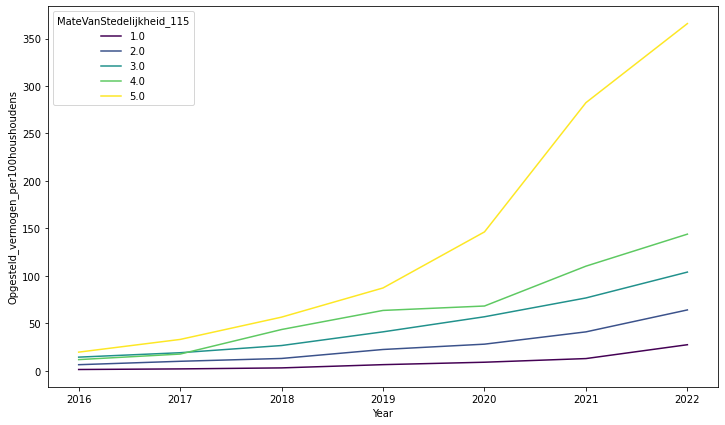

In [135]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'Opgesteld_vermogen_per100houshoudens', hue = 'MateVanStedelijkheid_115', 
             palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

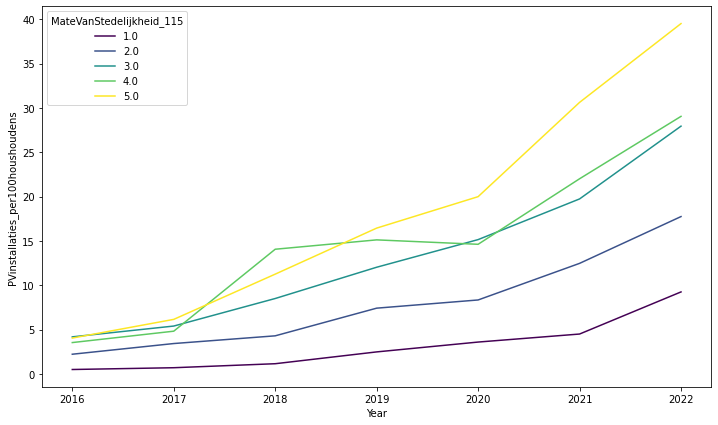

In [136]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV2, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'MateVanStedelijkheid_115', 
             palette = "viridis")

<a id='koop'></a>
#### 2. Percentage of privately owned houses

In [137]:
bins = [0, 20, 40, 60, 80, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100']

df['%_Koopwoningen'] = pd.cut(df['Koopwoningen_40'], bins, labels=names)

In [138]:
table_PV3 = df.groupby(['Year', '%_Koopwoningen']).mean()
table_PV3 = table_PV3.reset_index()

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

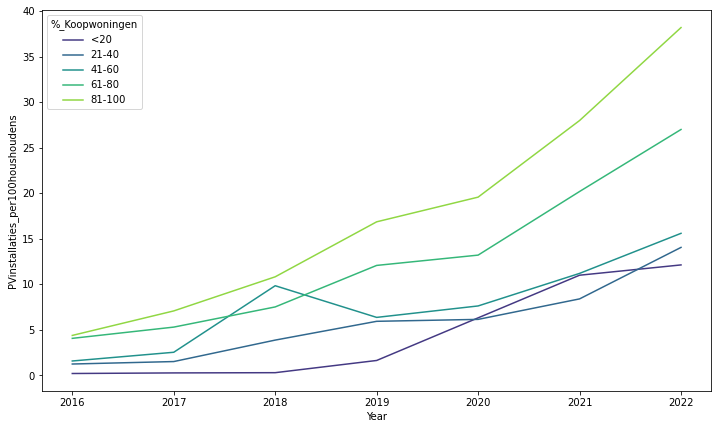

In [139]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV3, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = '%_Koopwoningen', 
             palette = "viridis")

<a id='een'></a>
#### 3. Percentage of one family houses

In [140]:
bins = [0, 20, 40, 60, 80, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100']

df['Perc_Eengezinswoning'] = pd.cut(df['PercentageEengezinswoning_36'], bins, labels=names)
df.head()

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning
13015,2016,De Meerendonk,7.0,27.0,3.857143,5216,175,2.7,644.0,355.0,...,NaN,0.645161,0.314286,1.0,0.3,3.0,15.428571,4.000000,61-80,61-80
13007,2016,De Gestelse Buurt,4.0,12.0,3.000000,5216,565,2.2,7301.0,171.0,...,1.750000,0.734694,0.123894,0.8,0.4,2.0,2.123894,0.707965,<20,41-60
12999,2016,Bazeldonk,3.0,10.0,3.333333,5216,900,1.7,6407.0,215.0,...,2.007874,0.841424,0.138889,0.7,0.9,1.0,1.111111,0.333333,21-40,21-40
13046,2016,Graafsebuurt-Zuid,7.0,19.0,2.714286,5213,975,1.9,10382.0,184.0,...,1.778523,0.804290,0.138462,0.8,0.4,1.0,1.948718,0.717949,21-40,61-80
13039,2016,De Hinthamerpoort,3.0,27.0,9.000000,5213,1240,1.7,12891.0,206.0,...,2.005682,0.853081,0.133065,0.7,0.8,1.0,2.177419,0.241935,21-40,41-60


In [141]:
table_PV4 = df.groupby(['Year', 'Perc_Eengezinswoning']).mean()
table_PV4 = table_PV4.reset_index()

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

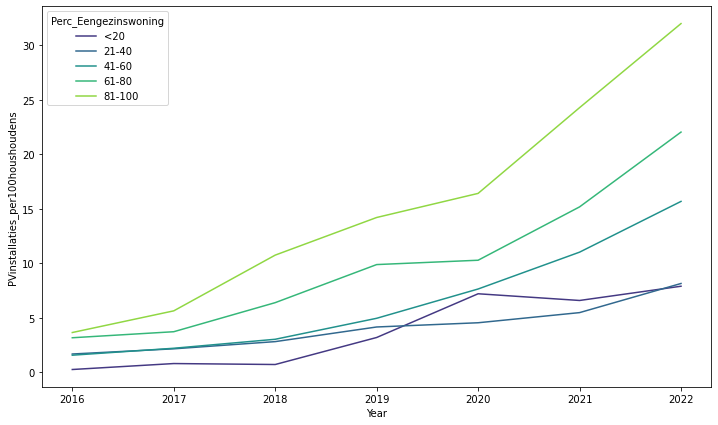

In [142]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV4, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'Perc_Eengezinswoning', 
             palette = "viridis")

<a id='pv2022'></a>
#### 4. Housholds with PV per 100 households in 2022

In [143]:
df2022 = df[df['Year'] == '2022']

In [144]:
df2022

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning
13248,2022,De Hoven,258.0,1129.0,4.375969,5245,970,3.1,6488.0,377.0,...,2.413613,0.626030,0.211340,1.2,0.4,4.0,116.391753,26.597938,61-80,81-100
13239,2022,De Watertuinen,220.0,1052.0,4.781818,5247,555,2.8,5671.0,360.0,...,2.362069,0.705128,0.270270,1.3,0.8,4.0,189.549550,39.639640,81-100,81-100
13230,2022,Broekland,313.0,1348.0,4.306709,5247,1245,2.7,4845.0,328.0,...,2.276860,0.700730,0.172691,1.2,0.5,4.0,108.273092,25.140562,61-80,61-80
13216,2022,De Overlaet-West,305.0,1280.0,4.196721,5241,1030,2.4,4224.0,336.0,...,2.172414,0.831683,0.233010,1.3,0.6,3.0,124.271845,29.611650,61-80,81-100
13207,2022,De Overlaet-Oost,339.0,1196.0,3.528024,5247,1180,2.6,5702.0,296.0,...,2.070248,0.796020,0.152542,1.3,0.5,3.0,101.355932,28.728814,61-80,81-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,2022,Kom Nuland,511.0,2419.0,4.733855,5391,1405,2.4,2040.0,307.0,...,1.891386,0.808081,0.238434,1.4,0.5,5.0,172.170819,36.370107,61-80,81-100
13572,2022,Bokhoven,53.0,365.0,6.886792,5221,115,2.5,102.0,488.0,...,2.090909,0.701754,0.434783,1.5,2.2,5.0,317.391304,46.086957,81-100,81-100
13563,2022,De Haverleij,239.0,989.0,4.138075,5221,925,2.5,1449.0,356.0,...,2.370588,0.764331,0.275676,1.3,0.6,5.0,106.918919,25.837838,81-100,61-80
13554,2022,De Vutter,14.0,199.0,14.214286,5221,30,3.0,258.0,NaN,...,1.875000,1.000000,3.333333,NaN,0.9,5.0,663.333333,46.666667,81-100,81-100


In [145]:
bins = [0, 20, 40, 60, 80, 100, np.inf]
names = ['<20', '21-40', '41-60', '61-80', '81-100', '>100']

df2022['PVinstallaties_per100houshoudens_groups'] = pd.cut(df2022['PVinstallaties_per100houshoudens'], bins, labels=names)

In [146]:
df2022 = df2022[['BU_NAAM', 'PVinstallaties_per100houshoudens_groups']]

In [147]:
df2022.head()

,BU_NAAM,PVinstallaties_per100houshoudens_groups
13248,De Hoven,21-40
13239,De Watertuinen,21-40
13230,Broekland,21-40
13216,De Overlaet-West,21-40
13207,De Overlaet-Oost,21-40


In [148]:
df = df.merge(df2022, left_on= 'BU_NAAM', right_on = 'BU_NAAM')

In [149]:
df.head()

,Year,BU_NAAM,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens,%_Koopwoningen,Perc_Eengezinswoning,PVinstallaties_per100houshoudens_groups
0,2016,De Meerendonk,7.0,27.0,3.857143,5216,175,2.7,644.0,355.0,...,0.645161,0.314286,1.0,0.3,3.0,15.428571,4.000000,61-80,61-80,41-60
1,2017,De Meerendonk,12.0,46.0,3.833333,5216,175,2.7,644.0,355.0,...,0.645161,0.314286,1.0,0.3,3.0,26.285714,6.857143,61-80,61-80,41-60
2,2018,De Meerendonk,15.0,57.0,3.800000,5216,175,2.7,644.0,355.0,...,0.645161,0.314286,1.0,0.3,3.0,32.571429,8.571429,61-80,61-80,41-60
3,2019,De Meerendonk,27.0,100.0,3.703704,5216,175,2.7,644.0,355.0,...,0.645161,0.314286,1.0,0.3,3.0,57.142857,15.428571,61-80,61-80,41-60
4,2020,De Meerendonk,28.0,137.0,4.892857,5216,175,2.7,644.0,355.0,...,0.645161,0.314286,1.0,0.3,3.0,78.285714,16.000000,61-80,61-80,41-60


In [150]:
df['PVinstallaties_per100houshoudens'].nlargest(5)

96     99.032258
454    77.142857
95     56.451613
170    51.780822
230    46.666667
Name: PVinstallaties_per100houshoudens, dtype: float64

In [151]:
df[df['PVinstallaties_per100houshoudens'].isin(df['PVinstallaties_per100houshoudens'].nlargest(5))].transpose()

,95,96,170,230,427,454
Year,2021,2022,2022,2021,2022,2022
BU_NAAM,De Herven,De Herven,Orthen-West,Het Vinkel,De Vutter,Bedrijventerrein Nuland
Aantal aansluitingen met opwekinstallatie,175.0,307.0,189.0,21.0,14.0,27.0
Opgesteld vermogen,806.0,1290.0,325.0,183.0,199.0,376.0
OV_per_installatie,4.605714,4.201954,1.719577,8.714286,14.214286,13.925926
MeestVoorkomendePostcode_113,5232,5232,5231,5248,5221,5391
HuishoudensTotaal_28,310,310,365,45,30,35
GemiddeldeHuishoudensgrootte_32,2.7,2.7,1.9,2.5,3.0,2.7
Bevolkingsdichtheid_33,1702.0,1702.0,2102.0,34.0,258.0,713.0
GemiddeldeWoningwaarde_35,581.0,581.0,214.0,NaN,NaN,NaN


In [152]:
df['PVinstallaties_per100houshoudens_groups'].value_counts()

<20       249
21-40     215
41-60      47
81-100      7
61-80       6
>100        0
Name: PVinstallaties_per100houshoudens_groups, dtype: int64

In [153]:
table_PV5 = df.groupby(['Year', 'PVinstallaties_per100houshoudens_groups']).mean()
table_PV5 = table_PV5.reset_index()

In [154]:
table_PV5

,Year,PVinstallaties_per100houshoudens_groups,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen,OV_per_installatie,MeestVoorkomendePostcode_113,HuishoudensTotaal_28,GemiddeldeHuishoudensgrootte_32,Bevolkingsdichtheid_33,GemiddeldeWoningwaarde_35,...,GemiddeldElektriciteitsverbruikTotaal_47,GemiddeldAardgasverbruikTotaal_55,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2016,<20,17.447368,52.473684,3.268604,5224.078947,1116.052632,1.963158,5905.210526,249.837838,...,2645.789474,1122.368421,2.019428,0.815496,0.255118,0.905405,0.657895,1.842105,5.174875,1.713945
1,2016,21-40,35.419355,127.774194,3.782556,5261.258065,799.032258,2.503226,3263.451613,352.033333,...,3558.709677,1502.580645,2.128447,0.767362,0.315590,1.266667,0.770968,3.645161,16.181319,4.122440
2,2016,41-60,5.428571,18.142857,4.018132,5252.571429,178.571429,2.428571,662.857143,351.500000,...,3961.428571,1730.000000,2.006095,0.883873,1.450821,1.200000,1.400000,4.428571,16.704398,3.895970
3,2016,61-80,0.000000,0.000000,NaN,5391.000000,35.000000,2.700000,713.000000,NaN,...,5470.000000,2010.000000,2.000000,1.000000,1.285714,NaN,1.100000,5.000000,0.000000,0.000000
4,2016,81-100,46.000000,178.000000,3.869565,5232.000000,310.000000,2.700000,1702.000000,581.000000,...,4000.000000,1990.000000,2.672727,0.697674,0.241935,1.300000,1.200000,3.000000,57.419355,14.838710
5,2016,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017,<20,22.421053,68.105263,3.032970,5224.078947,1116.052632,1.963158,5905.210526,249.837838,...,2645.789474,1122.368421,2.019428,0.815496,0.255118,0.905405,0.657895,1.842105,7.181806,2.371122
7,2017,21-40,46.064516,165.000000,3.807099,5261.258065,799.032258,2.503226,3263.451613,352.033333,...,3558.709677,1502.580645,2.128447,0.767362,0.315590,1.266667,0.770968,3.645161,21.991276,5.620777
8,2017,41-60,11.000000,51.571429,5.113409,5252.571429,178.571429,2.428571,662.857143,351.500000,...,3961.428571,1730.000000,2.006095,0.883873,1.450821,1.200000,1.400000,4.428571,29.412452,5.859682
9,2017,61-80,3.000000,30.000000,10.000000,5391.000000,35.000000,2.700000,713.000000,NaN,...,5470.000000,2010.000000,2.000000,1.000000,1.285714,NaN,1.100000,5.000000,85.714286,8.571429


(0.0, 100.0)

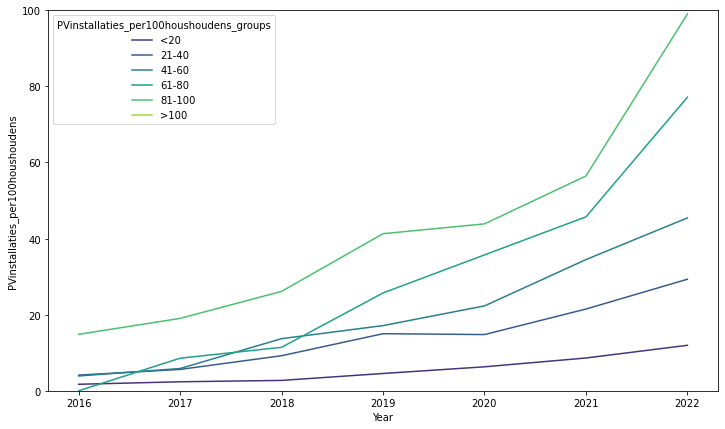

In [155]:
plt.figure(figsize = (12, 7))
ax = sns.lineplot(data = table_PV5, x = 'Year', y = 'PVinstallaties_per100houshoudens', 
             hue = 'PVinstallaties_per100houshoudens_groups', palette = "viridis")
ax.set_ylim([0, 100])

<a id='elec'></a>
#### 6. Average electricity consumption

<AxesSubplot:>

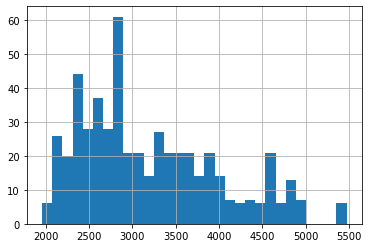

In [156]:
df['GemiddeldElektriciteitsverbruikTotaal_47'].hist(bins = 30)

In [157]:
bins = [0, 2500, 3000, 3500, 4000, 4500, np.inf]
names = ['<2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '>4500']

df['Elektriciteitsverbruik_bins'] = pd.cut(df['GemiddeldElektriciteitsverbruikTotaal_47'], bins, labels=names)
df.head().transpose()

,0,1,2,3,4
Year,2016,2017,2018,2019,2020
BU_NAAM,De Meerendonk,De Meerendonk,De Meerendonk,De Meerendonk,De Meerendonk
Aantal aansluitingen met opwekinstallatie,7.0,12.0,15.0,27.0,28.0
Opgesteld vermogen,27.0,46.0,57.0,100.0,137.0
OV_per_installatie,3.857143,3.833333,3.8,3.703704,4.892857
MeestVoorkomendePostcode_113,5216,5216,5216,5216,5216
HuishoudensTotaal_28,175,175,175,175,175
GemiddeldeHuishoudensgrootte_32,2.7,2.7,2.7,2.7,2.7
Bevolkingsdichtheid_33,644.0,644.0,644.0,644.0,644.0
GemiddeldeWoningwaarde_35,355.0,355.0,355.0,355.0,355.0


In [158]:
df['Elektriciteitsverbruik_bins'].value_counts()

2500-3000    154
<2500        117
3500-4000     84
3000-3500     83
>4500         59
4000-4500     27
Name: Elektriciteitsverbruik_bins, dtype: int64

In [159]:
table_PV7 = df.groupby(['Year', 'Elektriciteitsverbruik_bins']).mean()
table_PV7 = table_PV7.reset_index()

<AxesSubplot:xlabel='Year', ylabel='Opgesteld vermogen'>

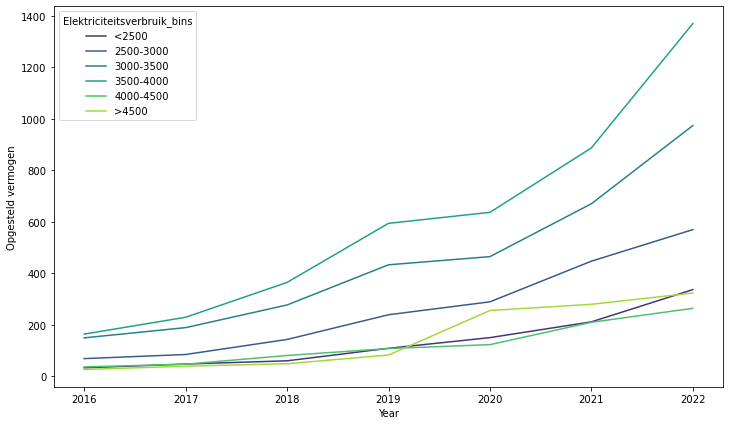

In [160]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV7, x = 'Year', y = 'Opgesteld vermogen', hue = 'Elektriciteitsverbruik_bins', 
             palette = "viridis")

<AxesSubplot:xlabel='Year', ylabel='PVinstallaties_per100houshoudens'>

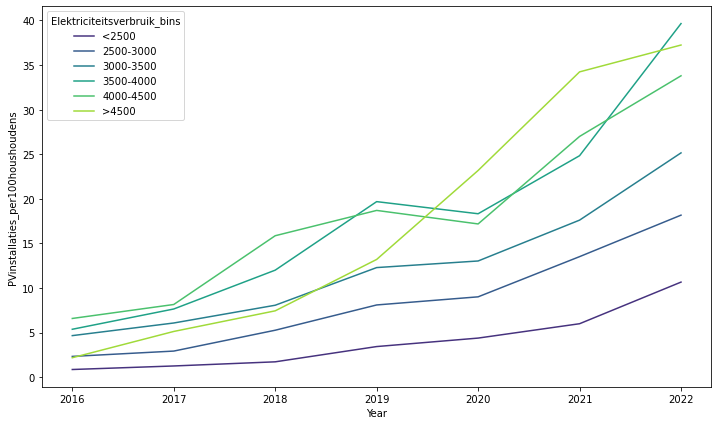

In [161]:
plt.figure(figsize = (12, 7))
sns.lineplot(data = table_PV7, x = 'Year', y = 'PVinstallaties_per100houshoudens', hue = 'Elektriciteitsverbruik_bins', 
             palette = "viridis")

Apparent decrease in the number of installations has to be explained